In [4]:
#import relevant libraries and packages
from math import sqrt,log
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scs
%matplotlib inline

In [53]:
doc = tex2py('\section{P=P_0+\frac{M\dot x ^ 2}{2Ax}+\frac{Mg}{A}\left(1-\frac{H}{x}\right)}')

In [54]:
doc.section

P=P_0+
rac{M\dot x ^ 2}{2Ax}+
rac{Mg}{A}\left(1-
rac{H}{x}
ight)

# Vutthipan solution

$$\dot x ^{2} = 4g\left(1+\frac{\beta}{2}\frac{P_0A}{Mg}\right)\left [\frac{H}{2}-\frac{x}{2+\beta}  \right ]-\frac{2g\beta x}{2+\beta}-\frac{\beta ^2}{2+\beta}\frac{P_0A}{Mg}gH^{\frac{2}{\beta}+1}x^{-\frac{2}{\beta}}$$
$$P=P_0+\frac{M\dot x ^ 2}{2Ax}+\frac{Mg}{A}\left(1-\frac{H}{x}\right)$$
### Resultant force acting on piston
$$\Sigma F = PA - P_0A - (M+m)g$$

In [34]:
#defining timestep
ts = 0.0001
#defining variables
P0=101325.0
f=3.0
M=10328.75
H=10.0
g = 9.81
A = 1.0
#defining initial condition
t = 0.0
x = H - 0.000001
#defining storage columns
del_x_col = np.array([])
x_col = np.array([])
t_col = np.array([])
P_col = np.array([])
F_col = np.array([])

In [33]:
def sqrt_handled(val):
    try:
        return sqrt(val)
    except Exception as e:
        if val < 0.0:
            return -sqrt(abs(val)) #this is rough assumption
        else:
            print(e)
            return 1.0
def del_x(x):
    return ts*sqrt_handled(4*g*(1.0+f*P0*A/(M*g*2.0))*(H/2.0 - x/(2.0+f))-2.0*g*f*x/(2.0+f) - ((f**2.0)*P0*A*g*H**((2.0/f)+1)*x**(-2.0/f))/(M*g*(2.0+f)))
def P(x):
    return P0*H/x+2.0/f*(-(M*del_x(x)**2)/(2.0*A*x*ts**2)+(M*g)*(-1.0+(H/x))/A)
def F(x):
    return P(x)*A - P0*A - M*g

In [35]:
while t<2.0:
    del_x_col = np.concatenate([del_x_col,np.array([del_x(x)])])
    x_col = np.concatenate([x_col,np.array([x])])
    t_col = np.concatenate([t_col,np.array([t])])
    P_col = np.concatenate([P_col,np.array([P(x)])])
    F_col = np.concatenate([F_col,np.array([F(x)])])
    x -= del_x(x)
    t += ts
indx = np.argmin(del_x_col)
print(del_x_col[indx])
print(x_col[indx])

-2.907957140118645e-05
2.9598196929503886


In [36]:
x_col = x_col.reshape(x_col.shape[0],1)
del_x_col = del_x_col.reshape(del_x_col.shape[0],1)
t_col = t_col.reshape(t_col.shape[0],1)
P_col = P_col.reshape(P_col.shape[0],1)
F_col = F_col.reshape(F_col.shape[0],1)

In [26]:
print(x_col.shape)
print(F_col.shape)
print(t_col.shape)

(2001, 1)
(2001, 1)
(2001, 1)


In [18]:
for i in range(del_x_col.shape[0]):
    if del_x_col[i,0] <= del_x_col[np.argmin(del_x_col[:])]:
        print(i)

1521
1523
1525
1527
1529
1531
1533
1535
1537
1539
1541
1543
1545
1547
1549
1551
1553
1555
1557
1559
1561
1563
1565
1567
1569
1571
1573
1575
1577
1579
1581
1583
1585
1587
1589
1591
1593
1595
1597
1599
1601
1603
1605
1607
1609
1611
1613
1615
1617
1619
1621
1623
1625
1627
1629
1631
1633
1635
1637
1639
1641
1643
1645
1647
1649
1651
1653
1655
1657
1659
1661
1663
1665
1667
1669
1671
1673
1675
1677
1679
1681
1683
1685
1687
1689
1691
1693
1695
1697
1699
1701
1703
1705
1707
1709
1711
1713
1715
1717
1719
1721
1723
1725
1727
1729
1731
1733
1735
1737
1739
1741
1743
1745
1747
1749
1751
1753
1755
1757
1759
1761
1763
1765
1767
1769
1771
1773
1775
1777
1779
1781
1783
1785
1787
1789
1791
1793
1795
1797
1799
1801
1803
1805
1807
1809
1811
1813
1815
1817
1819
1821
1823
1825
1827
1829
1831
1833
1835
1837
1839
1841
1843
1845
1847
1849
1851
1853
1855
1857
1859
1861
1863
1865
1867
1869
1871
1873
1875
1877
1879
1881
1883
1885
1887
1889
1891
1893
1895
1897
1899
1901
1903
1905
1907
1909
1911
1913
1915
1917
1919


In [12]:
x_col[15162]

IndexError: index 15162 is out of bounds for axis 0 with size 3477

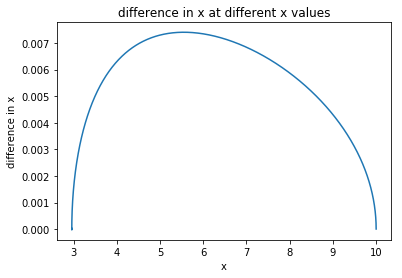

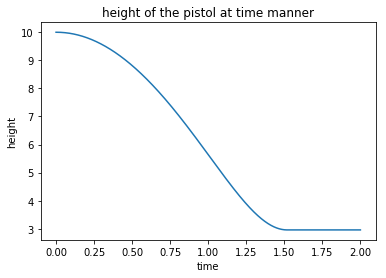

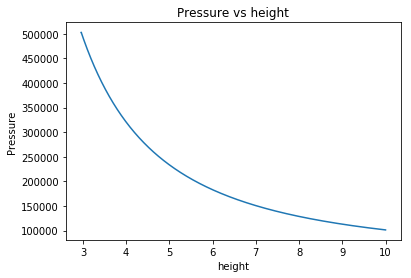

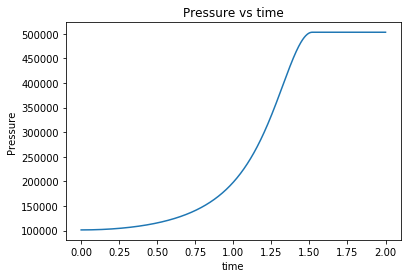

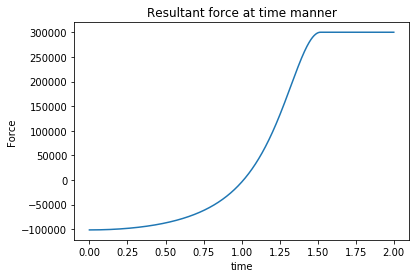

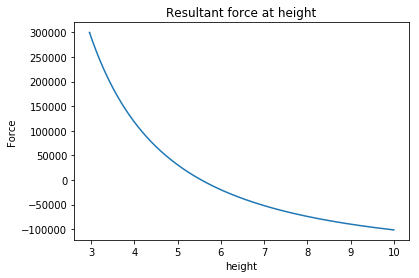

In [37]:
plt.plot(x_col,del_x_col)
plt.xlabel('x')
plt.ylabel('difference in x')
plt.title("difference in x at different x values")
plt.show()
plt.plot(t_col,x_col)
plt.xlabel('time')
plt.ylabel('height')
plt.title("height of the pistol at time manner")
plt.show()
plt.plot(x_col,P_col)
plt.xlabel('height')
plt.ylabel('Pressure')
plt.title("Pressure vs height")
plt.show()
plt.plot(t_col,P_col)
plt.xlabel('time')
plt.ylabel('Pressure')
plt.title("Pressure vs time")
plt.show()

plt.plot(t_col,F_col)
plt.xlabel('time')
plt.ylabel('Force')
plt.title('Resultant force at time manner')
plt.show()

plt.plot(x_col,F_col)
plt.xlabel('height')
plt.ylabel('Force')
plt.title('Resultant force at height')
plt.show()

# My solution 
(in the condition of $PV^\gamma$ is constant but it's not since its behaviour is far from ideal gas) 

### $$\dot x ^ 2 = \frac{2c_1}{1-\gamma}\left(x ^ {1-\gamma}-H^{1-\gamma}\right) + c_2\left(x-H\right)$$ 
$$when \hspace{1cm}  c_1 = \left(\frac{mg}{A}+P_A\right)AH^\gamma
\hspace{1cm} and \hspace{1cm}    c_2 = -\left(P_AA+(M+m)g\right)$$

In [16]:
#defining timestep
ts = 0.000001
#defining variables
Pa = 101325.0
f = 3.0
gamma = 1.0+2.0/f
m = 3328.75
M = 7000.0
H = 10.0
g = 9.81
A = 1.0
sum_mass = M+m
c1 = (m*g/A+Pa)*A*H**gamma
c2 = (-1.0)*(Pa*A+sum_mass*g)
#defining initial condition
t = 0.0
x = H - 0.000001
#defining storage columns
del_x_col = np.array([])
x_col = np.array([])
t_col = np.array([])

In [17]:
def del_x(x):
    return ts*sqrt(abs((2.0*c1/(1-gamma))*(x**(1.0-gamma)-H**(1.0-gamma))+c2*(x-H)))

In [18]:
while (del_x(x) != 0.0 and x > 1.0):
    del_x_col = np.concatenate([del_x_col,np.array([del_x(x)])])
    x_col = np.concatenate([x_col,np.array([x])])
    t_col = np.concatenate([t_col,np.array([t])])
    x -= del_x(x)
    t += ts
indx = np.argmin(del_x_col)
print(del_x_col[indx])
print(x_col[indx])

2.5555832952086705e-07
9.999999


In [19]:
x_col = x_col.reshape(x_col.shape[0],1)
del_x_col = del_x_col.reshape(del_x_col.shape[0],1)
t_col = t_col.reshape(t_col.shape[0],1)

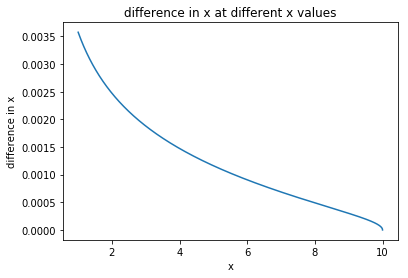

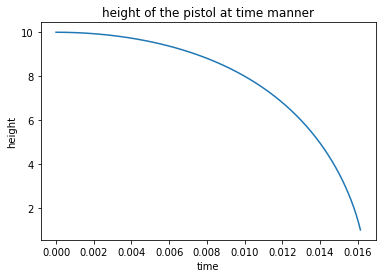

In [20]:
plt.plot(x_col,del_x_col)
plt.xlabel('x')
plt.ylabel('difference in x')
plt.title("difference in x at different x values")
plt.show()
plt.plot(t_col,x_col)
plt.xlabel('time')
plt.ylabel('height')
plt.title("height of the pistol at time manner")
plt.show()

# Van der waals gas solution
Note: Equation or code must be wrong if you have time solve it again.

$$P(x) = \left(1-\frac{Nb}{Ax}\right)^{-1}\left[P_0\frac{H}{x}+\frac{1}{A}\left[\frac{2Mg}{\beta}\left(\frac{H}{x}-1\right)-\frac{M\dot x ^ 2}{\beta x}+\left(\frac{N^2a}{Ax}\left(\frac{1}{x}-\frac{1}{H}\right)-\frac{NbP_0}{x}+\frac{N^3ab}{A^2x}\left(\frac{1}{x^2}-\frac{1}{H^2}\right)\right)\right]\right]$$

In [23]:
#defining timestep
ts = 0.001
#some constants
Na = 6.022140857*10**23
#defining variables
P0=101325.0
f=3.0
M=10328.75
H=10.0
g = 9.81
A = 1.0
#constant a, b for 1 mole of hydrogen gas
#ref: https://www.engineeringtoolbox.com/non-ideal-gas-van-der-Waals-equation-constants-gas-law-d_1969.html
a = 0.2453*0.1*Na**(-2)
b = 0.02651*0.001*Na**(-1)
N = Na
#calculating constants
alpha1 = N**2.0*a/A
alpha2 = N**3.0*a*b/A**3
C1 = 2.0*(g-P0*A*f/(M*(f-2.0)))
C2 = -4.0*N**2.0*a/(M*A*f)
C3 = 4.0*N**3*a*b/(M*A**3*f)
#defining initial condition
t = 0.0
x = H - 0.0000001
#defining storage columns
del_x_col = np.array([])
x_col = np.array([])
t_col = np.array([])
P_col = np.array([])
F_col = np.array([])

#dummy constant
dummy = 4.0*g*(P0*A*f/(2.0*M*g)+1.0)/f
s_dummy = (2.0*dummy+4.0*g)/(2.0+f)

In [24]:
#calculating integral
def inte(x,dx):
    i = H
    val = 0
    while i > x:
        val += dx*(2.0/M)*(A*i-N*b)**(2.0/f)*(((A*x-N*b)/(A*x))**(-1)*(P0*A*(H/x)+2.0*M*g*(H/x-1)/f+(N**2.0*a*(1.0/x-1.0/H)/(A*x)-N*b*P0/x+N**3*a*b*(1.0/x**2.0-1.0/H**2.0)/(A**2.0*x)))-P0*A-M*g)
        i -= dx
    return val.real
ts*sqrt(-inte(9.5,0.00001)*(A*x-N*b)**(-2.0/f))

0.002966419804610373

In [25]:
def del_x(x):
    try:
        return ts*sqrt_handled(inte(x,0.0001)*(A*x-N*b)**(-2.0/f))
    except:
        print("there's error")
        return -1.0
'''def del_x(x):
    try:
        return ts*sqrt(abs((s_dummy-dummy*f/2.0)*H**(1.0+2.0/f)*x**(-2.0/f)-s_dummy*x+dummy*H*f/2.0))
    except:
        return x'''
'''def del_x(x):
    try:
        return ts*sqrt(abs(C1*(x-H)+C2*int_2(x,0.0001)*(x-H)**(2.0/f)+C3*int_3(x,0.0001)*(x-H)**(2.0/f)))
    except:
        return x'''
def P(x):
    try:
        return (1.0-N*b/(A*x))**(-1.0)*(P0*(H/x)+(1.0/A)*(2.0*M*g*(H/x-1.0)/f-M*(del_x(x)/ts)**2.0/(f*x)+(N**2.0*a*(1.0/x-1.0/H)/(A*x)-N*b*P0/x+N**3*a*b*(1.0/x**2.0-1.0/H**2.0))))
    except Exception as e:
        print(str(e)+' at x= %0.4f' %x)
        return 99.99
def F(x):
    try:
        return P(x)*A - P0*A - M*g
    except Exception as e:
        print(str(e)+' at x= %0.4f' %x)
        return 99.99

In [26]:
for i in range(99):
    print("i= %0.2f" %(i/10.0) + ', diff in  x= %0.4f' %del_x(i/10.0))

there's error
i= 0.00, diff in  x= -1.0000
i= 0.10, diff in  x= 0.6449
i= 0.20, diff in  x= 0.3588
i= 0.30, diff in  x= 0.2536
i= 0.40, diff in  x= 0.1977
i= 0.50, diff in  x= 0.1625
i= 0.60, diff in  x= 0.1382
i= 0.70, diff in  x= 0.1203
i= 0.80, diff in  x= 0.1065
i= 0.90, diff in  x= 0.0955
i= 1.00, diff in  x= 0.0865
i= 1.10, diff in  x= 0.0790
i= 1.20, diff in  x= 0.0726
i= 1.30, diff in  x= 0.0671
i= 1.40, diff in  x= 0.0623
i= 1.50, diff in  x= 0.0581
i= 1.60, diff in  x= 0.0543
i= 1.70, diff in  x= 0.0509
i= 1.80, diff in  x= 0.0479
i= 1.90, diff in  x= 0.0451
i= 2.00, diff in  x= 0.0426
i= 2.10, diff in  x= 0.0403
i= 2.20, diff in  x= 0.0382
i= 2.30, diff in  x= 0.0362
i= 2.40, diff in  x= 0.0344
i= 2.50, diff in  x= 0.0327
i= 2.60, diff in  x= 0.0311
i= 2.70, diff in  x= 0.0296
i= 2.80, diff in  x= 0.0282
i= 2.90, diff in  x= 0.0269
i= 3.00, diff in  x= 0.0256
i= 3.10, diff in  x= 0.0244
i= 3.20, diff in  x= 0.0233
i= 3.30, diff in  x= 0.0222
i= 3.40, diff in  x= 0.0212
i= 3.

In [27]:
for i in range(99):
    print("i= %0.2f" %(i/10.0) + ', Pressure= %0.4f' %P(i/10.0) + ', Force= %0.4f' %F(i/10.0))

float division by zero at x= 0.0000
float division by zero at x= 0.0000
i= 0.00, Pressure= 99.9900, Force= -202550.0475
i= 0.10, Pressure= -14307099411.9559, Force= -14307302061.9934
i= 0.20, Pressure= -2207794243.7941, Force= -2207996893.8316
i= 0.30, Pressure= -732542544.4252, Force= -732745194.4627
i= 0.40, Pressure= -332190094.0864, Force= -332392744.1239
i= 0.50, Pressure= -178632319.2368, Force= -178834969.2743
i= 0.60, Pressure= -106925811.0717, Force= -107128461.1092
i= 0.70, Pressure= -68879524.7841, Force= -69082174.8216
i= 0.80, Pressure= -46796835.7017, Force= -46999485.7392
i= 0.90, Pressure= -33097269.6911, Force= -33299919.7286
i= 1.00, Pressure= -24150692.7525, Force= -24353342.7900
i= 1.10, Pressure= -18064990.2316, Force= -18267640.2691
i= 1.20, Pressure= -13785921.9469, Force= -13988571.9844
i= 1.30, Pressure= -10693542.4276, Force= -10896192.4651
i= 1.40, Pressure= -8406689.2502, Force= -8609339.2877
i= 1.50, Pressure= -6682076.5212, Force= -6884726.5587
i= 1.60, Pr

In [28]:
while (x > 0.0):
    del_x_col = np.concatenate([del_x_col,np.array([del_x(x)])])
    x_col = np.concatenate([x_col,np.array([x])])
    t_col = np.concatenate([t_col,np.array([t])])
    P_col = np.concatenate([P_col,np.array([P(x)])])
    F_col = np.concatenate([F_col,np.array([F(x)])])
    x -= del_x(x)/A
    t += ts
indx = np.argmin(del_x_col)
print(del_x_col[indx])
print(x_col[indx])

4.465142757821912e-06
6.2500088919923975


In [29]:
x_col = x_col.reshape(x_col.shape[0],1)
del_x_col = del_x_col.reshape(del_x_col.shape[0],1)
t_col = t_col.reshape(t_col.shape[0],1)
P_col = P_col.reshape(P_col.shape[0],1)
F_col = F_col.reshape(F_col.shape[0],1)

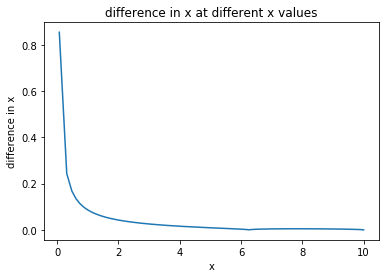

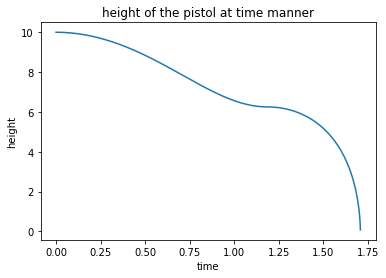

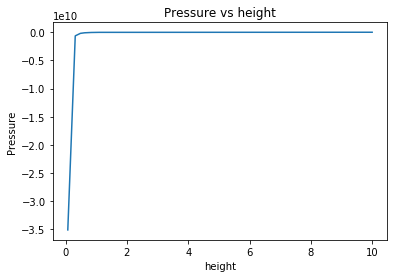

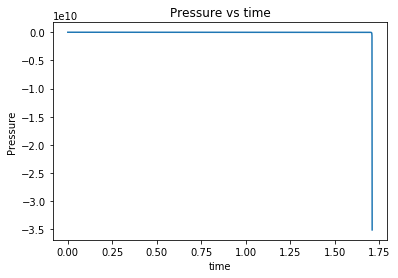

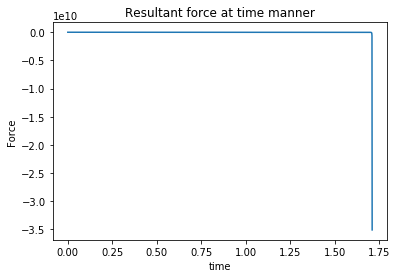

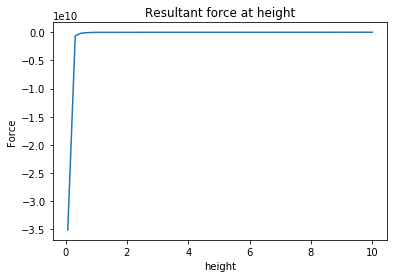

In [30]:
plt.plot(x_col,del_x_col)
plt.xlabel('x')
plt.ylabel('difference in x')
plt.title("difference in x at different x values")
plt.show()
plt.plot(t_col,x_col)
plt.xlabel('time')
plt.ylabel('height')
plt.title("height of the pistol at time manner")
plt.show()
plt.plot(x_col,P_col)
plt.xlabel('height')
plt.ylabel('Pressure')
plt.title("Pressure vs height")
plt.show()
plt.plot(t_col,P_col)
plt.xlabel('time')
plt.ylabel('Pressure')
plt.title("Pressure vs time")
plt.show()

plt.plot(t_col,F_col)
plt.xlabel('time')
plt.ylabel('Force')
plt.title('Resultant force at time manner')
plt.show()

plt.plot(x_col,F_col)
plt.xlabel('height')
plt.ylabel('Force')
plt.title('Resultant force at height')
plt.show()